<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
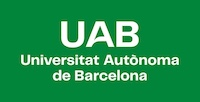
</div>
</div>
<div style="float: right; width: 50%;">
    <p style="margin: 0; padding-top: 22px; text-align:right;"><b>104338 - Programació Avançada</b></p>
    <p style="margin: 0; text-align:right;">Grau en Enginyeria de Dades</p>
    <p style="margin: 0; text-align:right;">Universitat Autònoma de Barcelona (UAB)</p>
</div>
<div style="width: 100%; clear: both;"></div>
<div style="width:100%;">&nbsp;</div>

# Encapsulament i abstracció de dades

## 1. Abstracció de dades

Els **clients** (programes que utilitzen la classe) no han de conèixer ni tenir accés directe a la **representació interna** de la classe, ja que qualsevol canvi o consulta a l'estat intern de la classe s'ha de fer utilitzant els mètodes de la **interfície pública** de la classe.

La interfície pública amaga (**abstreu**) la representació interna de la classe als programes/classes (clients) que la utilitzen per evitar que qualsevol canvi en els detalls de la implementació, impliqui modificacions en tots els clients.

Això s'aconsegueix amb l'**encapsulament de dades**: distingir entre part privada i pública de la classe.

Vegem, a través d'un exemple, la problemàtica associada en el cas de **no utilitzar correctament l'encapsulament i abastracció de dades**.

En primer lloc, volem definir una classe `Punt` que ens permeti guardar les coordenades d'un punt a l'espai 2D i realitzar algunes operacions bàsiques amb ell.

In [1]:
class Punt:
    x: float
    y: float
    
    def __init__(self, x=0, y=0):
        self.x = x
        self.y = y

    def distancia_origen(self):
        return math.sqrt(self.x**2 + self.y**2)

    def punt_mig(self, p):
        return Punt((self.x + p.x)/2, (self.y + p.y)/2)

    def __sub__(self, p):
        return math.sqrt((self.x - p.x)**2 + (self.y - p.y)**2)

    def __eq__(self, p):
        return self.x == p.x and self.y == p.y

    def __str__(self):
        return "(" + str(self.x) + ", " + str(self.y) + ")"

A continuació, creem unes funcions que ens permeten generar un conjunt de punts (a partir de l'_input_ del teclat) per crear un polígon i la seva _bounding box_.

In [2]:
def llegeix_poligon():
    n_vertexs = int(input("Número de vèrtexs del polígon: "))
    poligon = []
    for i in range(n_vertexs):
        x = float(input("x: "))
        y = float(input("y: "))
        poligon.append(Punt(x, y))
    return poligon


def bounding_box(poligon):
    x = [p.x for p in poligon]
    y = [p.y for p in poligon]
    top_left = Punt(min(x), min(y))
    bottom_right = Punt(max(x), max(y))
    return top_left, bottom_right


def area_bounding_box(bb):
    dx = bb[1].x - bb[0].x
    dy = bb[1].y - bb[0].y
    return dx * dy


poligon = llegeix_poligon()
bb = bounding_box(poligon)
area = area_bounding_box(bb)
print("Bounding box:", bb[0], bb[1])
print("Area bounding box", area)

Número de vèrtexs del polígon:  3
x:  0
y:  0
x:  1
y:  1
x:  2
y:  2


Bounding box: (0.0, 0.0) (2.0, 2.0)
Area bounding box 4.0


Ara, imaginem que volem canviar la representació interna de la classe `Punt`, per exemple, per permetre que representem punts en un espai vectorial de 3 o més dimensions. Per tant, ens cal poder emmagatzemar més de 2 coordenades.

- Què passa si canviem la representació interna de la classe `Punt` i guardem les coordenades `x` i `y` en una llista?

In [3]:
from typing import List

class Punt:
    coordenades: List[float]

    def __init__(self, x=0.0, y=0.0):
        self.coordenades = [x, y]

    def distancia_origen(self):
        return math.sqrt(self.coordenades[0]**2 + self.coordenades[1]**2)

    def punt_mig(self, p):
        return Punt((self.coordenades[0] + p.coordenades[0])/2, (self.coordenades[1] + p.coordenades[1])/2)

    def __sub__(self, p):
        return math.sqrt((self.coordenades[0] - p.coordenades[0])**2 + (self.coordenades[1] - p.coordenades[1])**2)

    def __eq__(self, p):
        return self.coordenades[0] == p.coordenades[0] and self.coordenades[1] == p.coordenades[1]

    def __str__(self):
        return "(" + str(self.coordenades[0]) + ", " + str(self.coordenades[1]) + ")"

In [4]:
def llegeix_poligon():
    n_vertexs = int(input("Número de vèrtexs del polígon: "))
    poligon = []
    for i in range(n_vertexs):
        x = float(input("x: "))
        y = float(input("y: "))
        poligon.append(Punt(x, y))
    return poligon


def bounding_box(poligon):
    x = [p.coordenades[0] for p in poligon]
    y = [p.coordenades[1] for p in poligon]
    top_left = Punt(min(x), min(y))
    bottom_right = Punt(max(x), max(y))
    return top_left, bottom_right


def area_bounding_box(bb):
    dx = bb[1].x - bb[0].x
    dy = bb[1].y - bb[0].y
    return dx * dy


poligon = llegeix_poligon()
bb = bounding_box(poligon)
area = area_bounding_box(bb)
print("Bounding box:", bb[0], bb[1])
print("Area bounding box", area)

Número de vèrtexs del polígon:  3
x:  0
y:  0
x:  1
y:  1
x:  2
y:  2


AttributeError: 'Punt' object has no attribute 'x'

## 2. Encapsulament de dades: part privada i pública

- La **part pública** d'una classe defineix la **interfície pública** de la classe i és accessible des de qualsevol classe o programa extern que hagi d'utilitzar la classe.
- La **part privada** d'una classe defineix la **representació interna**  de la classe i només és accessible des del codi de la pròpia classe. No s'hi pot accedir des de classes o programes externs que utilitzin la classe. 
- En Python, els atributs o mètodes privats de la classe s'indiquen posen un **caràcter de subratllat `_`** davant del nom de l'atribut o mètode.
- És una convenció implícita. No és una obligació, **és només una recomanació**: els programes externs poden seguir accedint als atributs privats, però un bon programador en Python mai ho farà.


Tornem al exemple anterior, però aquesta vegada aplicant els conceptes d'abstracció i encapsulament de dades.

In [5]:
import math

class Punt:
    _x: float = 0.0
    _y: float = 0.0
    
    def __init__(self, x=0.0, y=0.0):
        self._x = x
        self._y = y
  
    def distancia_origen(self):
        return math.sqrt(self._x**2 + self._y**2)

    def punt_mig(self, p):
        return Punt((self._x + p._x)/2, (self._y + p._y)/2)

    def __sub__(self, p):
        return math.sqrt((self._x - p._x)**2 + (self._y - p._y)**2)

    def __eq__(self, p):
        return self._x == p._x and self._y == p._y

    def __str__(self):
        return "(" + str(self._x) + ", " + str(self._y) + ")"

In [7]:
p = Punt()
p._x = float(input())
p._y = float(input())
d = p.distancia_origen()
print(p)
print(p._x, p._y)

 2
 3


(2.0, 3.0)
2.0 3.0


## 3. Accés al valor dels atributs privats: `getters` i `setters`

- **getters**: Mètodes per recuperar el valor d'un atribut privat.
- **setters**: Mètodes per modificar el valor d'una atribut privat.

Continuem amb l'exemple dels punts i els polígons.

In [8]:
import math

class Punt:
    _x: float = 0.0
    _y: float = 0.0

    def __init__(self, x=0.0, y=0.0):
        self._x = x
        self._y = y
    
    def get_x(self):
        return self._x

    def set_x(self, valor):
        self._x = valor

    def get_y(self):
        return self._y

    def set_y(self, valor):
        self._y = valor
    
    def distancia_origen(self):
        return math.sqrt(self._x**2 + self._y**2)

    def punt_mig(self, p):
        return Punt((self._x + p._x)/2, (self._y + p._y)/2)

    def __sub__(self, p):
        return math.sqrt((self._x - p._x)**2 + (self._y - p._y)**2)

    def __eq__(self, p):
        return self._x == p._x and self._y == p._y

    def __str__(self):
        return "(" + str(self._x) + ", " + str(self._y) + ")"

In [9]:
p = Punt()
p.set_x(float(input()))
p.set_y(float(input()))
d = p.distancia_origen()
print(p)
print(p.get_x(), p.get_y())

 2
 3


(2.0, 3.0)
2.0 3.0


In [10]:
def llegeix_poligon():
    n_vertexs = int(input("Número de vèrtexs del polígon: "))
    poligon = []
    for i in range(n_vertexs):
        x = float(input("x: "))
        y = float(input("y: "))
        poligon.append(Punt(x, y))
    return poligon


def bounding_box(poligon):
    x = [p.get_x() for p in poligon]
    y = [p.get_y() for p in poligon]
    top_left = Punt(min(x), min(y))
    bottom_right = Punt(max(x), max(y))
    return top_left, bottom_right


def area_bounding_box(bb):
    dx = bb[1].get_x() - bb[0].get_x()
    dy = bb[1].get_y() - bb[0].get_y()
    return dx * dy


poligon = llegeix_poligon()
bb = bounding_box(poligon)
area = area_bounding_box(bb)
print("Bounding box:", bb[0], bb[1])
print("Area bounding box", area)

Número de vèrtexs del polígon:  3
x:  0
y:  0
x:  1
y:  1
x:  2
y:  2


Bounding box: (0.0, 0.0) (2.0, 2.0)
Area bounding box 4.0


### 3.1. Properties

`@property` és un **decorador** que converteix un mètode que fa de `getter/setter` en una propietat.

Les **propietats** permeten posar les crides als `getters`/`setters` com si fossin consultes/modificacions directes dels valors dels atributs. 

In [11]:
import math

class Punt:
    _x: float
    _y: float
    
    def __init__(self, x=0.0, y=0.0):
        self._x = x
        self._y = y

    @property
    def x(self):
        return self._x

    @x.setter
    def x(self, valor):
        self._x = valor

    @property
    def y(self):
        return self._y

    @y.setter
    def y(self, valor):
        self._y = valor

    def distancia_origen(self):
        return math.sqrt(self._x**2 + self._y**2)

    def punt_mig(self, p):
        return Punt((self._x + p._x)/2, (self._y + p._y)/2)

    def __sub__(self, p):
        return math.sqrt((self._x - p._x)**2 + (self._y - p._y)**2)

    def __eq__(self, p):
        return self._x == p._x and self._y == p._y

    def __str__(self):
        return "(" + str(self._x) + ", " + str(self._y) + ")"

In [12]:
p = Punt()
p.x = float(input())
p.y = float(input())
d = p.distancia_origen()
print(p)
print(p.x, p.y)

 2
 3


(2.0, 3.0)
2.0 3.0


I també es pot aplicar de la següent manera:

In [13]:
import math

class Punt:
    _x: float
    _y: float
    
    def __init__(self, x=0.0, y=0.0):
        self._x = x
        self._y = y

    def get_x(self):
        return self._x

    def set_x(self, valor):
        self._x = valor

    def get_y(self):
        return self._y

    def set_y(self, valor):
        self._y = valor

    def distancia_origen(self):
        return math.sqrt(self._x**2 + self._y**2)

    def punt_mig(self, p):
        return Punt((self._x + p._x)/2, (self._y + p._y)/2)

    def __sub__(self, p):
        return math.sqrt((self._x - p._x)**2 + (self._y - p._y)**2)

    def __eq__(self, p):
        return self._x == p._x and self._y == p._y

    def __str__(self):
        return "(" + str(self._x) + ", " + str(self._y) + ")"
    
    x = property(get_x, set_x)
    y = property(get_y, set_y)

In [14]:
p = Punt()
p.x = float(input())
p.y = float(input())
d = p.distancia_origen()
print(p)
print(p.x, p.y)

 2
 3


(2.0, 3.0)
2.0 3.0
